## Саммари по экспериментру. 
В этом блoкноте собраны настроки астры и параметры рейтресинга.
и результирующие траектории

In [23]:
import summary
summary.widget()


In [24]:
summary.info()


('Zen5_2021_10_05_16_14_41.zip', 'Zen5_2021_10_05_17_27_09.zip')


In [29]:
import race
R1 = race.Race(summary.selected_races[1])
print(len(R1.traj_list))
print(R1.traj_list[1])

dat/40167_01.exp.40167_02.equ.
init
7
lhcd/out/traj.1801734701598408.dat


In [30]:
print(len(R1.radial_data_list))
print(R1.radial_data_list[1])
profiles = R1.read_radial_data(R1.radial_data_list[1])
print(profiles.keys())
profiles['Time']

71
dat/40167_01.exp.40167_02.equ.2
dict_keys(['a', 'J', 'Plh', 'Johm', 'E', 'Te', 'En', 'CC', 'Q', 'Jlh', 'Upl', 'Zef', 'Poh', 'Ne', 'sig', 'Chr', 'Time'])


0.111

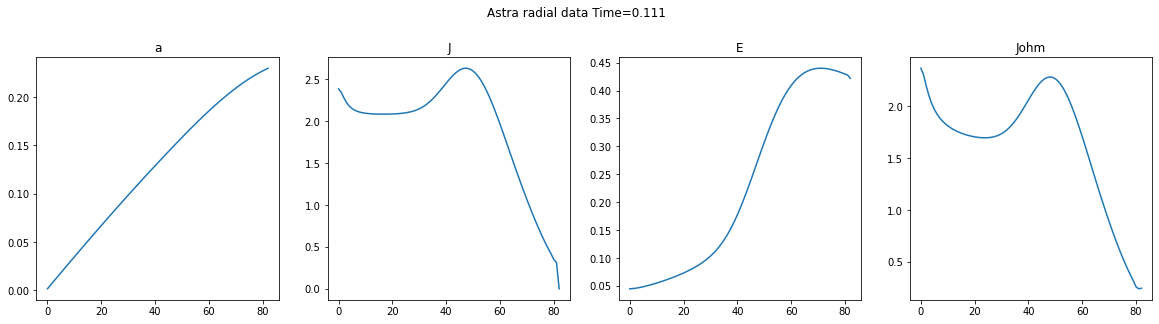

In [20]:
import matplotlib.pyplot as plt


grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle('Astra radial data Time={0}'.format(profiles['Time']))
ax1.plot(profiles['a'])
ax1.set_title("a")
ax1.set_box_aspect(1)

ax2.plot(profiles['J'])
ax2.set_title("J")
ax2.set_box_aspect(1)

ax3.plot(profiles['E'])
ax3.set_title("E")
ax3.set_box_aspect(1)

ax4.plot(profiles['Johm'])
ax4.set_title("Johm")
ax4.set_box_aspect(1)

In [47]:
from ipywidgets import interactive
import race
R1 = race.Race(summary.selected_races[0])
R2 = race.Race(summary.selected_races[1])
def plot_func(index):
    profiles = R1.read_radial_data(R1.radial_data_list[index-1])
    profiles2 = R2.read_radial_data(R2.radial_data_list[index-1])
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    fig.suptitle('Astra radial data Time={0}'.format(profiles['Time']))
    #fig.suptitle(R1.radial_data_list[index-1])
    axs[0,0].plot(profiles['a'])
    axs[0,0].plot(profiles2['a'])    
    axs[0,0].set_title("a")

    axs[1,0].plot(profiles['J'])
    axs[1,0].plot(profiles2['J'])
    axs[1,0].set_title("J")

    axs[0,1].plot(profiles['E'])
    axs[0,1].plot(profiles2['E'])    
    axs[0,1].set_title("E")
    
    axs[1,1].plot(profiles['Johm'])
    axs[1,1].plot(profiles2['Johm'])    
    axs[1,1].set_title("Johm")
    
    #for a in axs:
    #    a.set_box_aspect(1.5)
    plt.show()
 
w = interactive(plot_func, index = (1, len(R2.radial_data_list)))
w

dat/40167.exp.40167_01.equ.
init
dat/40167_01.exp.40167_02.equ.
init


interactive(children=(IntSlider(value=36, description='index', max=71, min=1), Output()), _dom_classes=('widge…

In [22]:
import astra
astra.summary()

 ======  ASTRA summary =====
Astra folder  D:\cygwin64\home\tmp8\ASTRA-6\a4
exp file      40167_01.exp
equ file      40167_02.equ


In [ ]:
import ray_tracing
ray_tracing.summary()

 ====================  Ray tracing summary ====================
Physical parameters                  rrange    0.0001                    Options                            
Freq      1.0                        eps       1e-06                     ipri      2                        
xmi1      2.0                        hdrob     1.5                       iw        -1                       
zi1       1.0                        cleft     0.7                       ismth     0                        
xmi2      16.0                       cright    1.5                       ismthalf  0                        
zi2       8.0                        cdel      0.25                      ismthout  1                        
dni2      0.03                       rbord     0.999                     inew      0                        
xmi3      1.0                        pchm      0.2                       itor      1                        
zi3       1.0                        pabs      0.01             

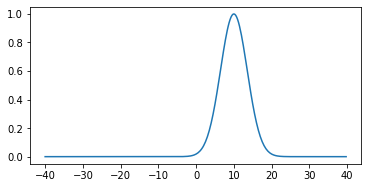

In [ ]:
ray_tracing.plot_spectrum()